# Data Cleaning and Exploratory Data Analysis

## Data Cleaning

1. Loading the raw data

In [1]:
import pandas as pd

neighborhood_file = "CombinedSummaryByNeighborhoodQuarter2022"
df = pd.read_csv("../data/%s.csv" %neighborhood_file)
df.head()

,uhf,neighborhood_name,year,quarter,er_visits,air_quality,asbestos,covid,electrical,food,...,mold,mosquitoes,rodent,safety,sewer,smoking,water_plumbing,felonies,misdemeanors,violations
0,306.0,Chelsea - Clinton,2022,1,192,1633,16,205,91,336,...,3,0,177,162,71,101,2181,1962,2696,607
1,306.0,Chelsea - Clinton,2022,2,188,942,18,1,74,501,...,3,2,247,103,117,91,1115,2459,3260,741
2,306.0,Chelsea - Clinton,2022,3,154,894,10,1,111,376,...,6,1,284,117,99,106,1036,2531,3315,703
3,306.0,Chelsea - Clinton,2022,4,173,959,14,0,77,469,...,12,0,165,121,69,121,2529,1631,2249,451
4,309.0,Union Square - Lower East Side,2022,1,228,65,1,101,91,130,...,0,0,169,131,72,38,3287,1230,2395,458


2. Remove `NULL` values

In [2]:
df.isna().sum()

uhf                  4
neighborhood_name    4
year                 0
quarter              0
er_visits            0
air_quality          0
asbestos             0
covid                0
electrical           0
food                 0
garbage              0
homelessness         0
medical              0
mold                 0
mosquitoes           0
rodent               0
safety               0
sewer                0
smoking              0
water_plumbing       0
felonies             0
misdemeanors         0
violations           0
dtype: int64

In [3]:
df[df.isna().any(axis=1)]

,uhf,neighborhood_name,year,quarter,er_visits,air_quality,asbestos,covid,electrical,food,...,mold,mosquitoes,rodent,safety,sewer,smoking,water_plumbing,felonies,misdemeanors,violations
40,NaN,NaN,2022,2,17,52,10,0,66,81,...,3,0,131,37,56,4,502,456,616,156
41,NaN,NaN,2022,3,27,26,6,1,54,86,...,2,0,187,54,65,6,511,556,666,181
42,NaN,NaN,2022,4,20,42,5,0,60,86,...,3,0,95,58,45,7,906,493,501,110
43,NaN,NaN,2022,1,22,41,14,40,37,47,...,2,0,81,56,40,14,929,357,596,162


In [4]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 171
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uhf                168 non-null    float64
 1   neighborhood_name  168 non-null    object 
 2   year               168 non-null    int64  
 3   quarter            168 non-null    int64  
 4   er_visits          168 non-null    int64  
 5   air_quality        168 non-null    int64  
 6   asbestos           168 non-null    int64  
 7   covid              168 non-null    int64  
 8   electrical         168 non-null    int64  
 9   food               168 non-null    int64  
 10  garbage            168 non-null    int64  
 11  homelessness       168 non-null    int64  
 12  medical            168 non-null    int64  
 13  mold               168 non-null    int64  
 14  mosquitoes         168 non-null    int64  
 15  rodent             168 non-null    int64  
 16  safety             168 non-null

3. Drop some columns (based on Renda's analysis)

In [5]:
drop_cols = ["neighborhood_name", "year", "quarter"]
drop_cols += ['air_quality','covid','mold','mosquitoes','felonies','misdemeanors'] # based on Renda's analysis
df.drop(drop_cols, axis=1, inplace=True)
df.head()

,uhf,er_visits,asbestos,electrical,food,garbage,homelessness,medical,rodent,safety,sewer,smoking,water_plumbing,violations
0,306.0,192,16,91,336,1544,423,36,177,162,71,101,2181,607
1,306.0,188,18,74,501,1265,1177,19,247,103,117,91,1115,741
2,306.0,154,10,111,376,1488,1902,28,284,117,99,106,1036,703
3,306.0,173,14,77,469,1491,1061,55,165,121,69,121,2529,451
4,309.0,228,1,91,130,1479,252,24,169,131,72,38,3287,458


4. Create buckets for `uhf` using county names `count` and then drop `uhf`

In [6]:
# reference from "https://www.nyc.gov/assets/doh/downloads/pdf/ah/zipcodetable.pdf"

df["uhf"] = df["uhf"].astype(int).astype(str)

county_mapping = {"1":"bronx", "2":"brooklyn", "3":"manhattan", "4":"queens", "5":"staten_island"}
df.insert(0, 'county', [county_mapping[x] for x in df['uhf'].str[0]])
df.drop('uhf', axis=1, inplace=True)
df.head()

,county,er_visits,asbestos,electrical,food,garbage,homelessness,medical,rodent,safety,sewer,smoking,water_plumbing,violations
0,manhattan,192,16,91,336,1544,423,36,177,162,71,101,2181,607
1,manhattan,188,18,74,501,1265,1177,19,247,103,117,91,1115,741
2,manhattan,154,10,111,376,1488,1902,28,284,117,99,106,1036,703
3,manhattan,173,14,77,469,1491,1061,55,165,121,69,121,2529,451
4,manhattan,228,1,91,130,1479,252,24,169,131,72,38,3287,458


## EDA

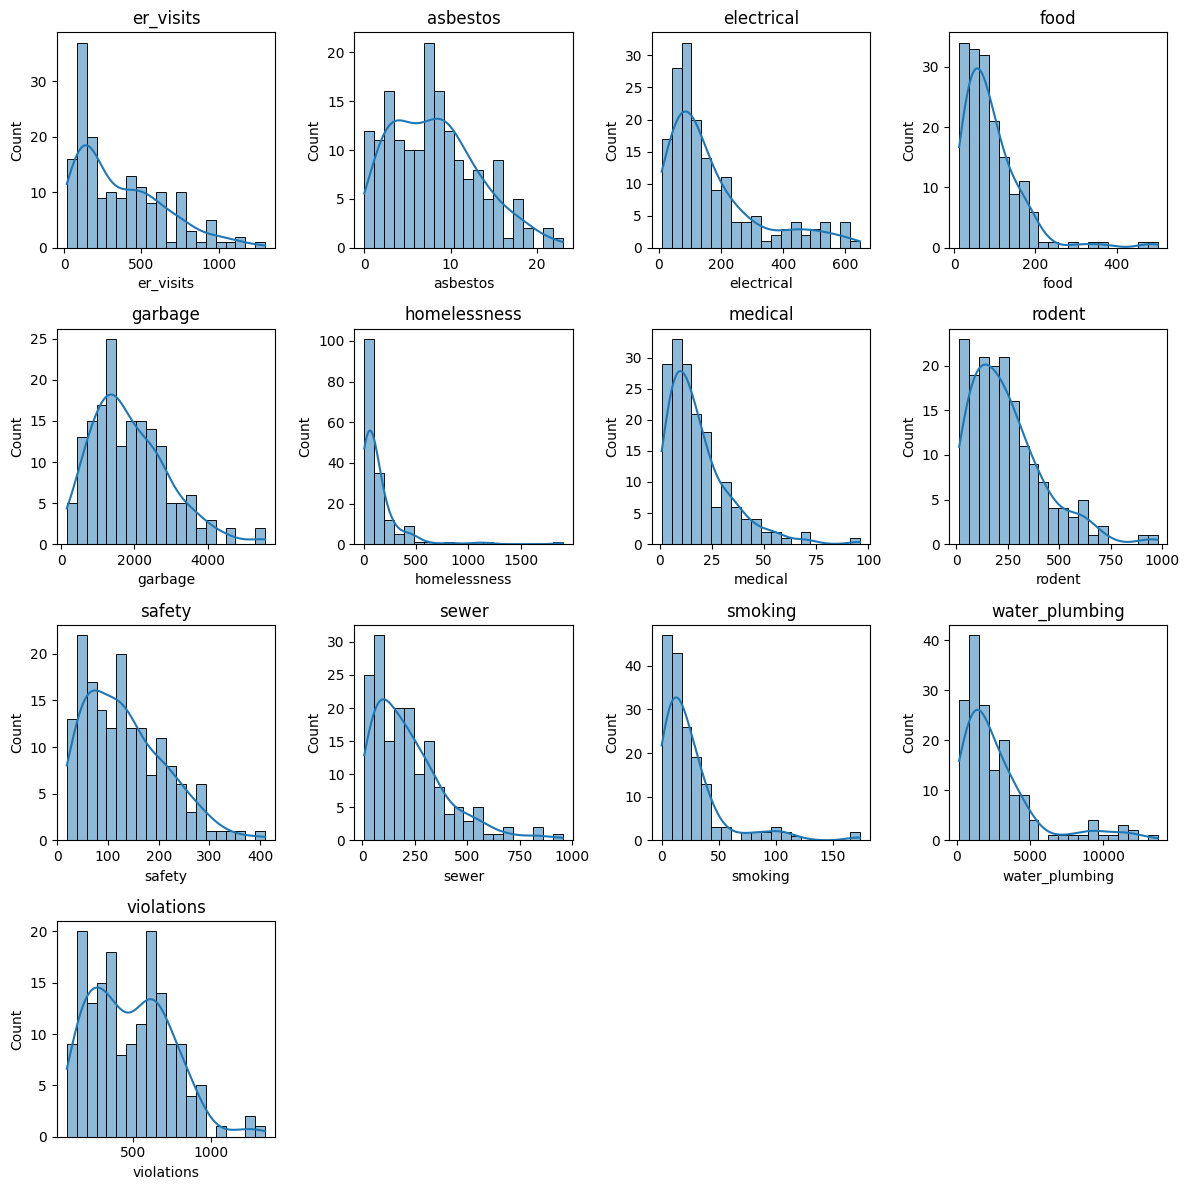

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb

feature_names = df.drop('county', axis=1).columns.to_list()

plt.figure(figsize=(12,12))

for i, column in enumerate(feature_names):
    plt.subplot(4, 4, i+1)
    sb.histplot(data=df, x=column, kde=True, bins=20)  # Use sb.histplot for newer versions
    plt.title(column)

plt.tight_layout()
plt.show()

,er_visits,asbestos,electrical,food,garbage,homelessness,medical,rodent,safety,sewer,smoking,water_plumbing,violations
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,362.732143,8.089286,169.976190,91.535714,1880.363095,136.732143,18.261905,241.815476,132.976190,219.577381,25.172619,2768.720238,479.494048
std,283.081683,5.056365,150.754547,74.702916,1039.390168,219.681955,15.160316,179.659646,79.701235,177.846651,28.881960,2704.547647,259.499172
min,17.000000,0.000000,9.000000,12.000000,157.000000,3.000000,1.000000,14.000000,19.000000,9.000000,0.000000,151.000000,70.000000
25%,126.000000,4.000000,70.000000,45.000000,1135.750000,26.000000,7.750000,110.250000,68.000000,80.000000,7.750000,1054.750000,268.750000
50%,291.000000,8.000000,110.500000,73.000000,1643.000000,70.500000,14.000000,208.000000,123.000000,178.500000,16.000000,1908.000000,460.000000
75%,539.500000,11.000000,222.500000,119.000000,2532.250000,147.750000,24.000000,327.500000,184.000000,308.000000,30.250000,3398.250000,655.500000
max,1301.000000,23.000000,647.000000,501.000000,5576.000000,1902.000000,96.000000,978.000000,410.000000,954.000000,174.000000,13698.000000,1352.000000


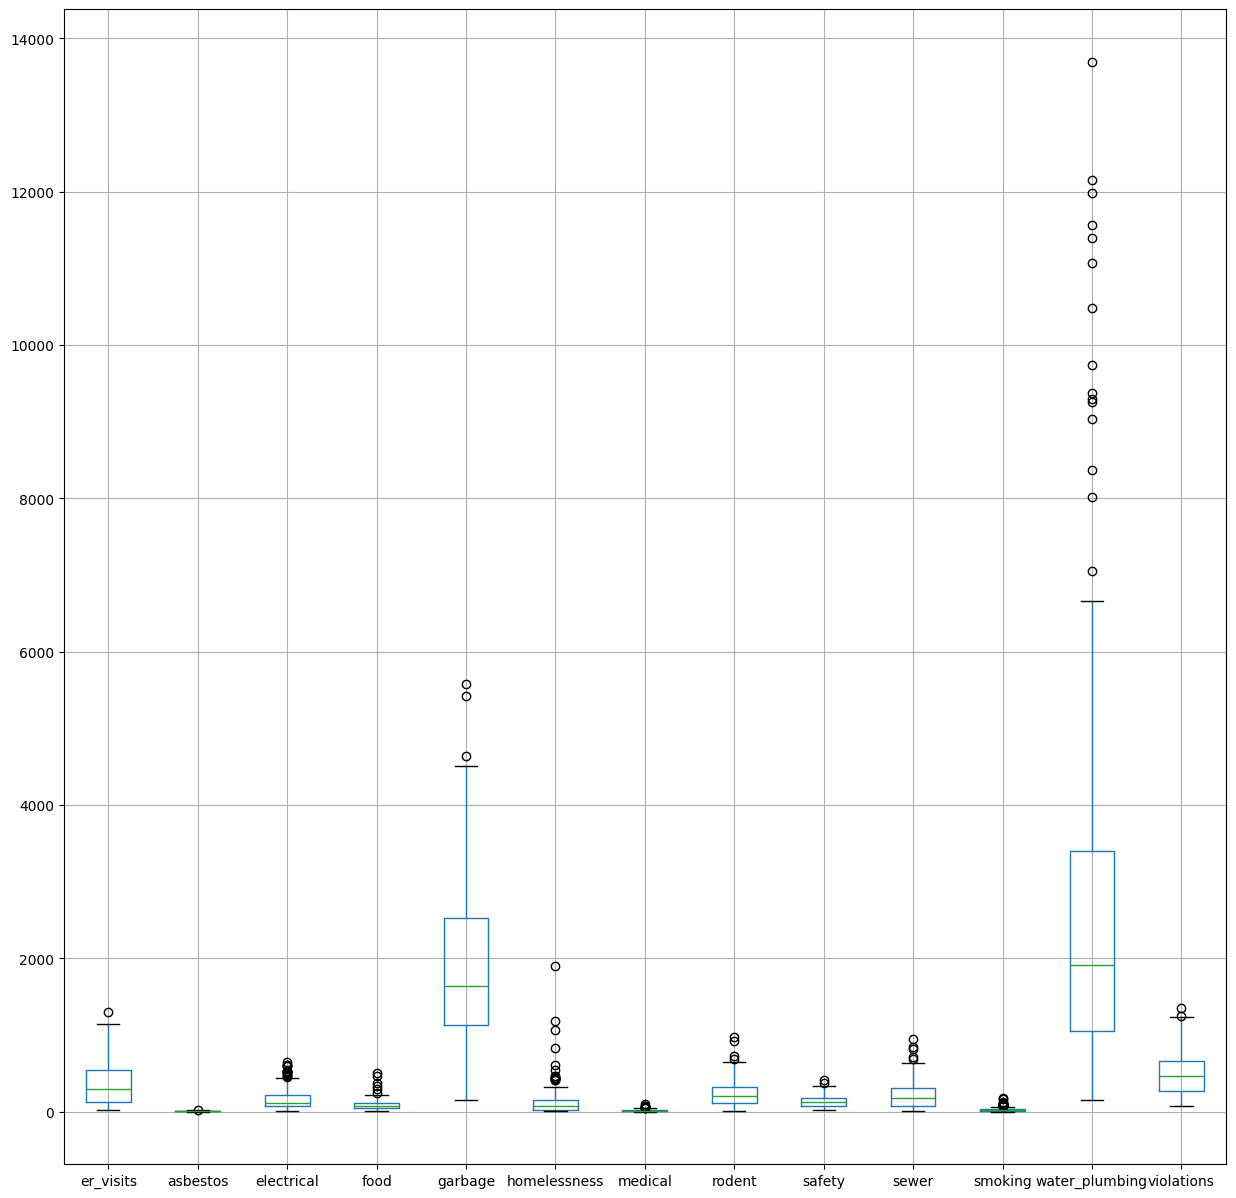

In [8]:
df.drop("county", axis=1).boxplot(figsize=(15,15))
df.describe()

From the above boxplot we can see that the data is not scaled.

**Note:** Scaled data always gives better results compared to unscaled data.

Scaling the data using `MinMaxScaler`

<Axes: >

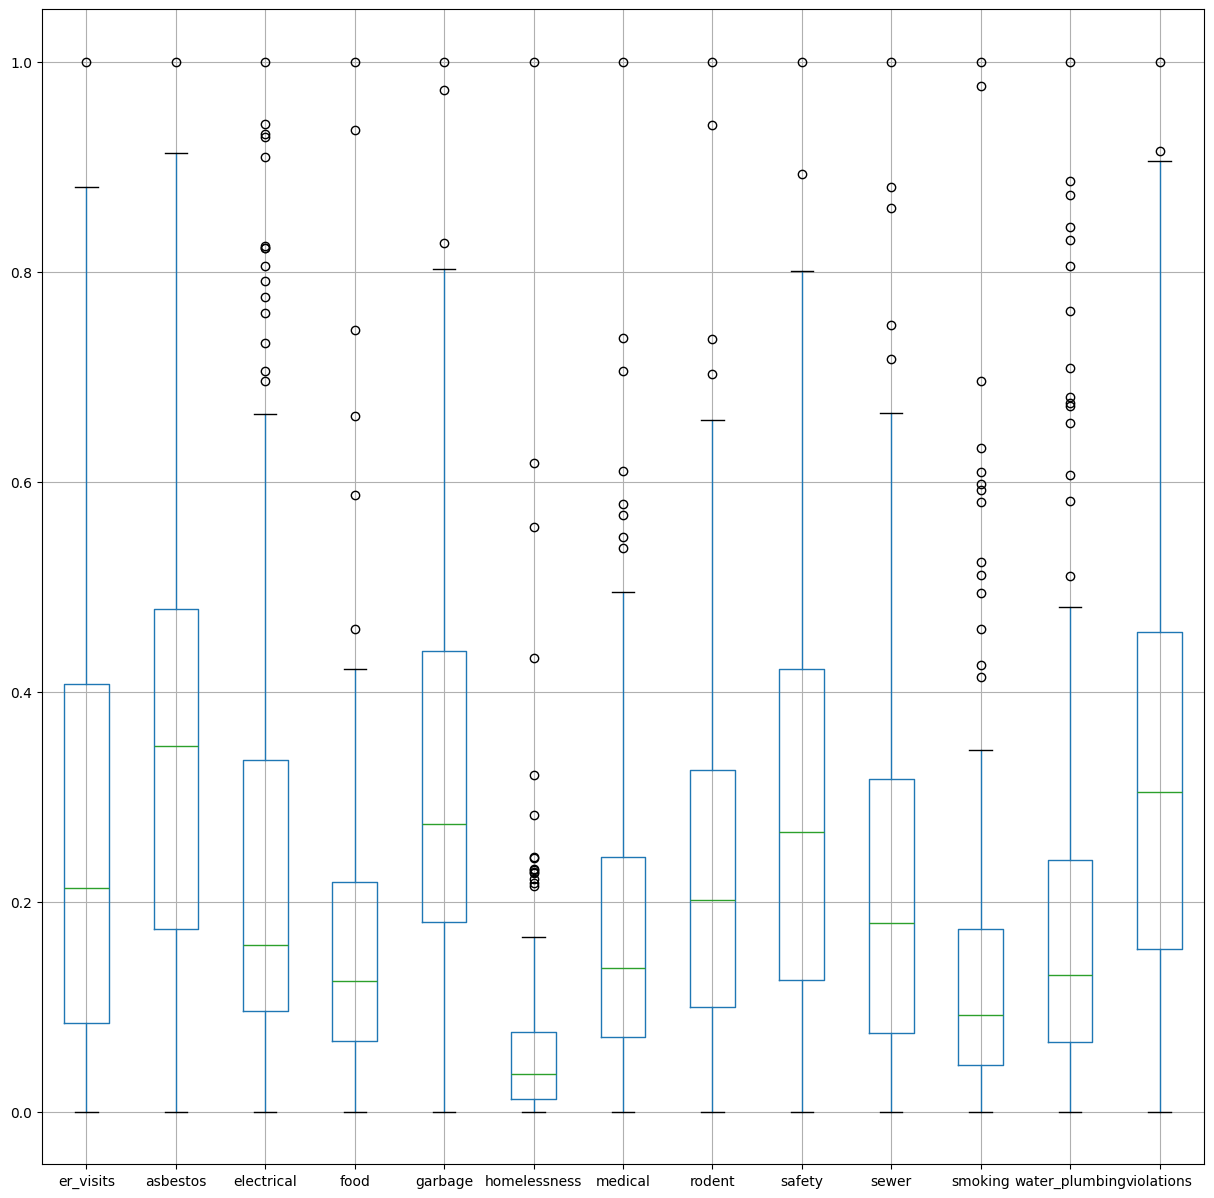

In [9]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df.drop("county",axis=1).values)
df_new = pd.DataFrame(x_scaled, columns=feature_names)
df_new.insert(0, "county", df["county"].values, allow_duplicates=False)
df_new.drop("county", axis=1).boxplot(figsize=(15,15))

Now, we can see that all quantitative variables are scaled between 0 - 1

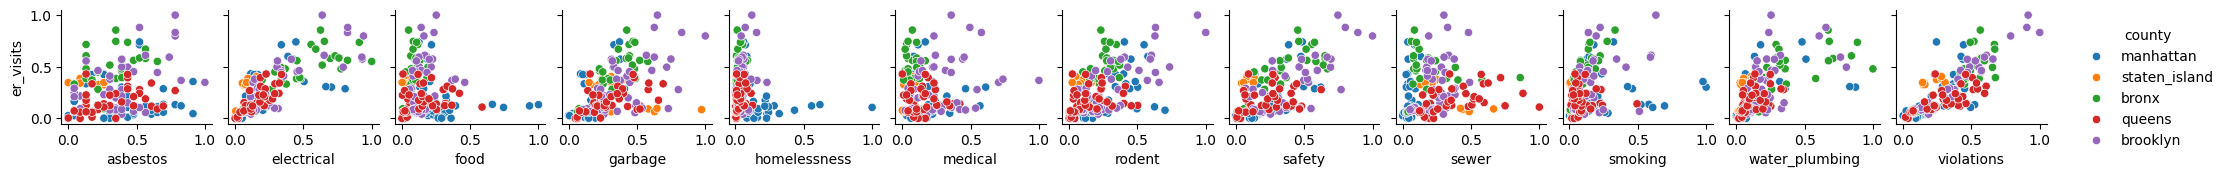

In [10]:
x_var_names = df_new.drop(['county','er_visits'], axis=1).columns.to_list()
pp = sb.pairplot(df_new, hue='county', y_vars='er_visits', x_vars=x_var_names, height=1.75)
#sb.move_legend(pp, "lower center", ncol = 5)

er_visits         1.000000
asbestos          0.230972
electrical        0.793777
food             -0.124846
garbage           0.507184
homelessness     -0.162723
medical           0.025137
rodent            0.563376
safety            0.639167
sewer             0.073048
smoking           0.262010
water_plumbing    0.616795
violations        0.826234
Name: er_visits, dtype: float64

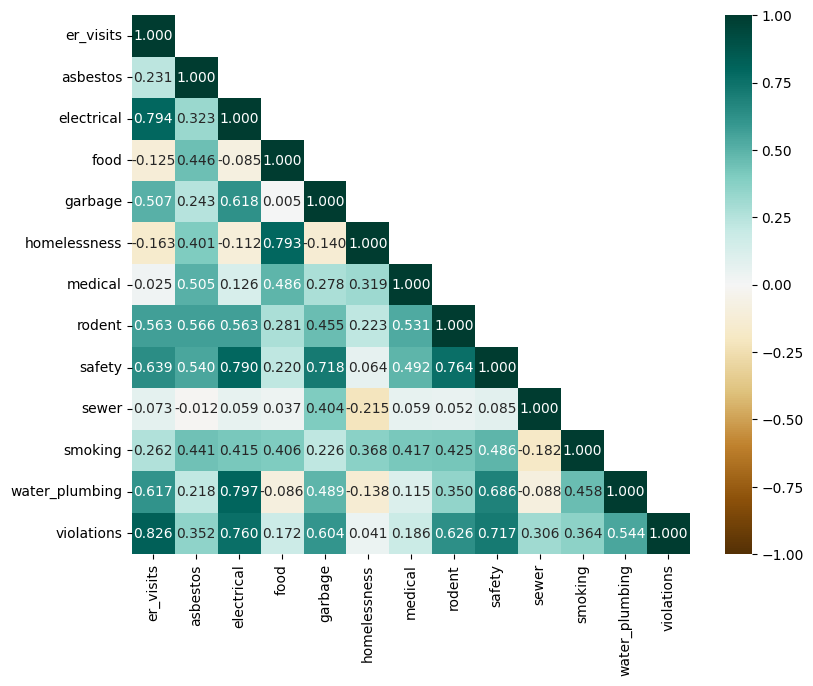

In [11]:
import numpy as np

corr = df_new.drop('county', axis=1).corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool), 1)
fig = plt.figure(figsize=(9,7))
ax = sb.heatmap(corr, vmin=-1, vmax=1, cmap='BrBG', mask=mask, annot=True, fmt='.3f')
corr['er_visits']

Dropping variables with Pearson Correlation Coef. < 0.3 (considered as weak or no linear relationship w.r.t `er_visits`)

In [12]:
drop_cols = corr['er_visits'][corr['er_visits'].abs().values < 0.3].index.to_list()
# these columns will be dropped since they have an absolute correlation value < 0.3
print(drop_cols)
df_new.drop(drop_cols, axis=1, inplace=True)
df_new.info()

['asbestos', 'food', 'homelessness', 'medical', 'sewer', 'smoking']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   county          168 non-null    object 
 1   er_visits       168 non-null    float64
 2   electrical      168 non-null    float64
 3   garbage         168 non-null    float64
 4   rodent          168 non-null    float64
 5   safety          168 non-null    float64
 6   water_plumbing  168 non-null    float64
 7   violations      168 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.6+ KB


Exporting the cleaned data into `.csv`

In [13]:
df_new.to_csv("../data/cleaned_%s.csv" %neighborhood_file, index=False)